# 0-1 Seabornの導入

In [12]:
import piplite
import pyodide
await piplite.install("seaborn")

import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


最初の設定を回す

In [ ]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/flights.csv"))
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


折れ線グラフを描くためのサンプルデータを読み込んだ

<AxesSubplot:xlabel='year', ylabel='passengers'>

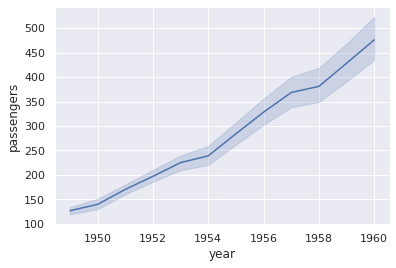

In [14]:
sns.lineplot(data = data, x = "year", y = "passengers")

Seabornで折れ線グラフを描くための関数は sns.lineplot である

<AxesSubplot:xlabel='year', ylabel='passengers'>

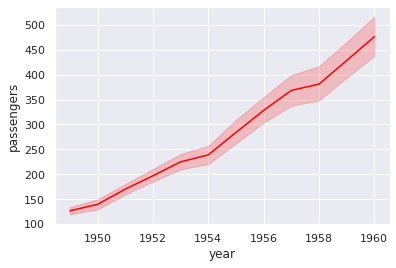

In [15]:
sns.lineplot(data = data, x = "year", y = "passengers", color = "red")

今までの図と同じくcolorオプションで色を変えることができる

<AxesSubplot:xlabel='year', ylabel='passengers'>

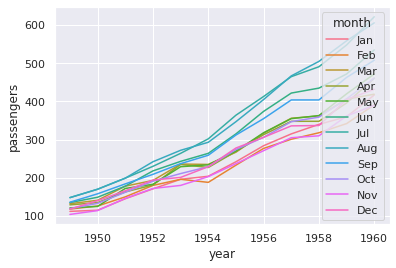

In [16]:
sns.lineplot(data = data, x = "year", y = "passengers", hue = "month")

hueオプションは指定した列によって違う色の線を描くために用いられる

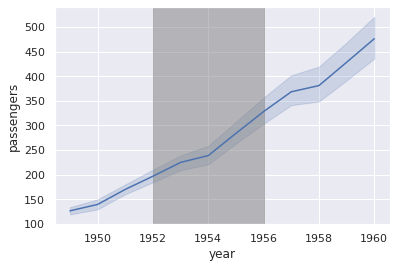

In [17]:
ax = sns.lineplot(data = data, x = "year", y = "passengers")
ax.axvspan(1952, 1956, alpha=0.5, color='grey')

折れ線グラフと共に、グラフの特定の期間に色を塗ることもおすすめである

# 0-2 プロットの設定

Text(0, 0.5, 'Kyaku')

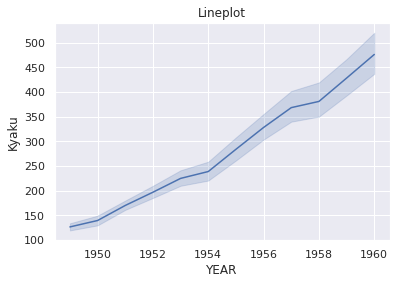

In [18]:
sns.lineplot(data = data, x = "year", y = "passengers")
plt.title("Lineplot")
plt.xlabel("YEAR")
plt.ylabel("Kyaku")

- plt.title()でタイトルの設定
- plt.ylabel()で縦軸のラベル設定
- plt.xlabel()で横軸のラベル設定

注意：日本語を対応させるにはものすごくややこしい作業が必要なので、英語だけ使う

# 1. 株価指数の折れ線グラフ

In [ ]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/index.csv"))
data["time"] = pd.to_datetime(data["time"])
data.head()

,time,SPI,KOSPI,STOXX,NIKKEI
0,1980-01-01,115.12,105.90,NaN,NaN
1,1980-02-01,113.66,103.74,NaN,NaN
2,1980-03-03,102.09,105.01,NaN,NaN
3,1980-04-01,106.29,116.10,NaN,NaN
4,1980-05-01,111.24,115.70,NaN,NaN


- SPI : 米国S&P指数
- KOSPI : 韓国KOSPI指数
- STOXX : ヨーロッパSTOXX指数
- NIKKEI : 日本日経225指数

<AxesSubplot:xlabel='time', ylabel='SPI'>

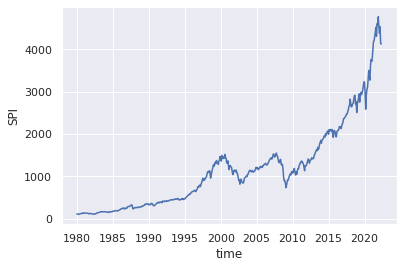

In [21]:
sns.lineplot(data = data, x = "time", y = "SPI")

飛躍的に増加していることが分かる

<AxesSubplot:xlabel='time', ylabel='STOXX'>

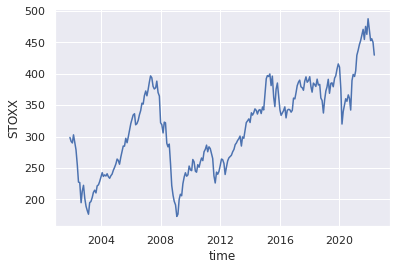

In [22]:
sns.lineplot(data = data, x = "time", y = "STOXX")

好きな指数一つを描いてみよう

In [23]:
data2 = data.melt(id_vars="time", value_vars=data.columns[1:])
data2.head()

,time,variable,value
0,1980-01-01,SPI,115.12
1,1980-02-01,SPI,113.66
2,1980-03-03,SPI,102.09
3,1980-04-01,SPI,106.29
4,1980-05-01,SPI,111.24


<AxesSubplot:xlabel='time', ylabel='value'>

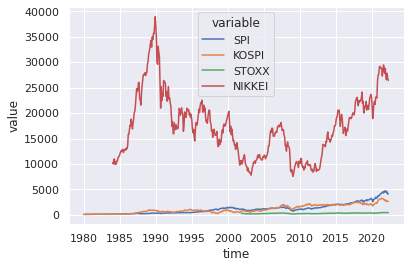

In [24]:
sns.lineplot(data = data2, x = "time", y = "value", hue = "variable")

同時に描くと比較できないことがわかった。

In [25]:
data3 = data2.copy(deep=True)
data3["value"] = np.log1p(data2.value.pct_change())
data3 = data3[data3["time"] >= "2010-01-01"]
data3.head()

,time,variable,value
360,2010-01-04,SPI,-0.037675
361,2010-02-01,SPI,0.028115
362,2010-03-01,SPI,0.057133
363,2010-04-01,SPI,0.014643
364,2010-05-03,SPI,-0.085523


<AxesSubplot:xlabel='time', ylabel='value'>

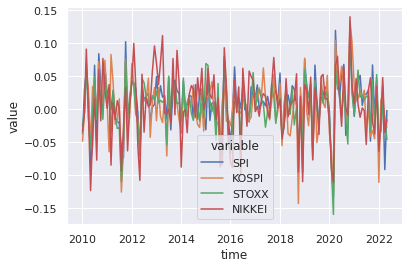

In [26]:
sns.lineplot(data = data3, x = "time", y = "value", hue = "variable")

対数差分で見ると、大体同じくらいの動きをしていることがわかる

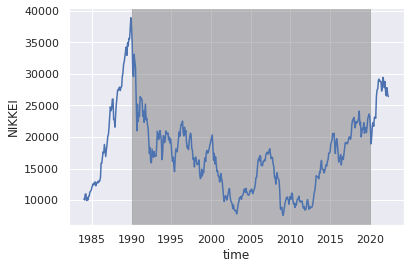

In [27]:
ax = sns.lineplot(data = data, x = "time", y = "NIKKEI")
ax.axvspan(pd.to_datetime("1990"), pd.to_datetime("2020"), alpha=0.5, color='grey')

失われた30年をグレーに塗ってみた

# 2. 国データの折れ線グラフ

In [ ]:
gdp = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/gdp_per_capita90to20.csv"))
pop = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/population90to20.csv"))
gdp.head()

,time,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,Angola,Antigua and Barbuda,Arab World,Argentina,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vietnam,World,Zambia,Zimbabwe
0,1990,NaN,2867.192554,2810.781204,4827.318484,8746.351882,5783.429552,15458.45719,9648.877727,14144.76367,...,30464.98856,40411.16034,6031.946205,11066.12886,3416.724096,2855.900688,1673.249806,9649.633383,2190.181724,3594.929437
1,1991,NaN,2783.028528,2771.225958,3496.580246,8431.388541,5649.782130,15588.02296,9620.785892,15221.79215,...,30035.89352,39831.58569,5957.607427,11377.03110,3328.189782,2864.818884,1736.014089,9621.060568,2133.687490,3705.493095
2,1992,NaN,2642.479937,2765.522571,3265.017429,8383.769007,5148.254857,15500.49184,9899.014974,16209.32598,...,30074.92008,40666.70058,5848.580362,12190.64869,2886.951480,2854.456012,1847.620493,9623.096190,2045.973499,3303.531630
3,1993,NaN,2551.342966,2665.864237,3599.027058,8027.376107,3788.509556,15991.91071,9889.760675,17312.03457,...,30749.92476,41238.78261,5953.331700,12422.95869,2757.178524,2793.240906,1957.644497,9631.399604,2133.263601,3280.406846
4,1994,NaN,2528.416435,2594.500887,3921.851207,7792.084354,3717.365229,16698.14716,9919.717985,18092.02081,...,31851.37706,42377.35551,6013.908681,13230.03194,2562.993905,2965.504032,2091.599345,9753.310591,1902.392868,3529.592419


ドル単位の一人当たりGDPデータと人口データを読み込んだ(1990-2020)

<AxesSubplot:xlabel='time', ylabel='Japan'>

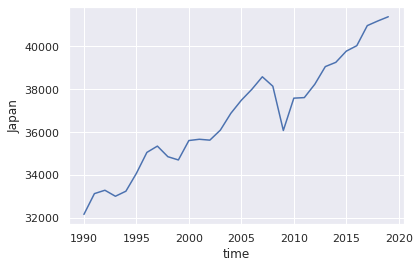

In [29]:
sns.lineplot(data = gdp, x = "time", y = "Japan")

日本のGDPを描いてみた

In [30]:
gdp2 = gdp.loc[:,["time", "Japan","United States", "South Korea", "Vietnam", "China"]].melt(id_vars="time",value_vars=["Japan","United States", "South Korea", "Vietnam", "China"])
gdp2.head()

,time,variable,value
0,1990,Japan,32168.76411
1,1991,Japan,33137.70311
2,1992,Japan,33294.91604
3,1993,Japan,33015.27657
4,1994,Japan,33250.17851


<AxesSubplot:xlabel='time', ylabel='value'>

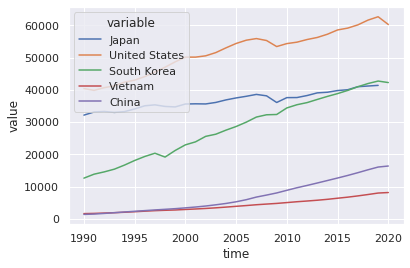

In [31]:
sns.lineplot(data = gdp2, x = "time", y = "value", hue="variable")

アメリカ、日本、韓国、ベトナム、中国の一人当たりGDPの折れ線グラフである

<AxesSubplot:xlabel='time', ylabel='Japan'>

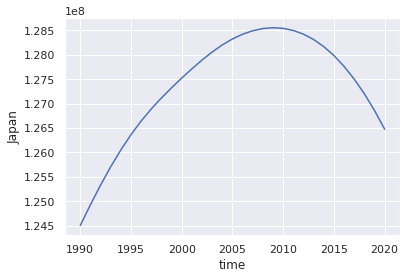

In [32]:
sns.lineplot(data = pop, x = "time", y = "Japan")

日本の人口が減っていることが分かる

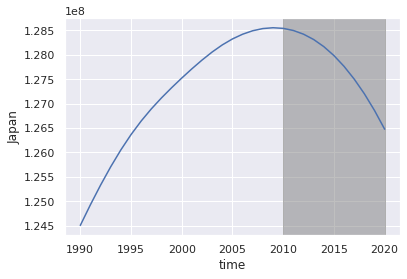

In [33]:
ax = sns.lineplot(data = pop, x = "time", y = "Japan")
ax.axvspan(2010, 2020, alpha=0.5, color='grey')

日本の人口が減ったところからグレーの領域を描いてみた

In [34]:
pop2 = pop.loc[:,["time", "Japan","United States", "South Korea", "Vietnam", "China"]].melt(id_vars="time",value_vars=["Japan","United States", "South Korea", "Vietnam", "China"])
pop2.head()

,time,variable,value
0,1990,Japan,124505243
1,1991,Japan,124929764
2,1992,Japan,125331300
3,1993,Japan,125707407
4,1994,Japan,126053127


<AxesSubplot:xlabel='time', ylabel='value'>

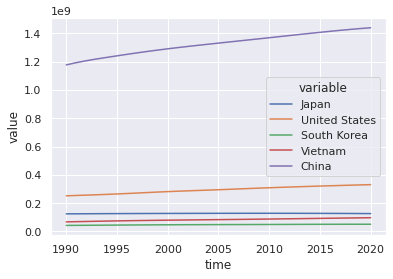

In [35]:
sns.lineplot(data = pop2, x = "time", y = "value", hue="variable")

アメリカ、日本、韓国、ベトナム、中国の人口の折れ線グラフである

<AxesSubplot:xlabel='time', ylabel='value'>

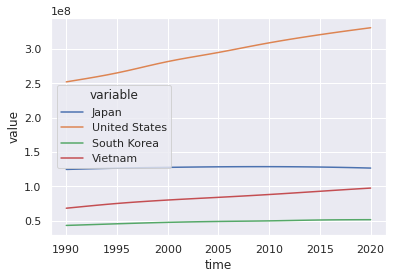

In [36]:
pop3 = pop2[pop2["variable"] != "China"]
sns.lineplot(data = pop3, x = "time", y = "value", hue="variable")

中国が人口が多すぎたので、のぞいて描いたら、このようになる

# ３. 暗号通貨の折れ線グラフ

In [ ]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/crypto.csv"))
data["time"] = pd.to_datetime(data["time"])
data.head()

,time,BTCUSD,ETHUSD,SPX,USOIL,GOLD
0,2015-01-01,218.45,NaN,1994.99,47.69,1283.09
1,2015-02-01,255.59,NaN,2104.50,49.41,1212.96
2,2015-03-01,245.50,NaN,2067.89,47.48,1183.30
3,2015-04-01,236.81,NaN,2085.51,59.75,1183.97
4,2015-05-01,230.21,NaN,2107.39,60.25,1190.00


暗号通貨とそれ以外の資産の価格データを読み込んだ
- BTCUSD : ビットコインの価格
- ETHUSD : イーサリウムの価格
- SPX : S&P500指数
- USOIL : 原油価格
- GOLD : 金の価格

<AxesSubplot:xlabel='time', ylabel='BTCUSD'>

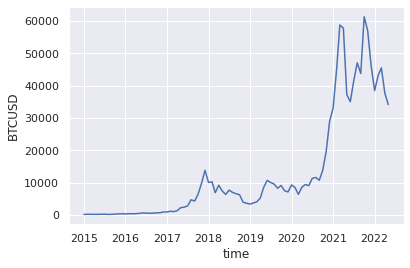

In [38]:
sns.lineplot(data = data, x = "time", y = "BTCUSD")

ビットコインの折れ線グラフ

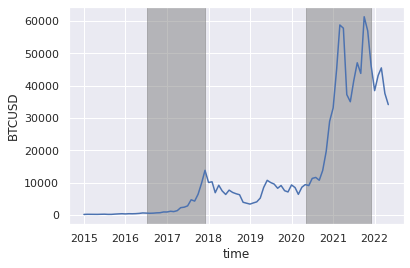

In [39]:
ax = sns.lineplot(data = data, x = "time", y = "BTCUSD")
ax.axvspan(pd.to_datetime("2016-07-09"), pd.to_datetime("2017-12-01"), alpha=0.5, color='grey')
ax.axvspan(pd.to_datetime("2020-05-11"), pd.to_datetime("2021-12-01"), alpha=0.5, color='grey')

ビットコインの半減期をグレーに塗ってみた

<AxesSubplot:xlabel='time', ylabel='ETHUSD'>

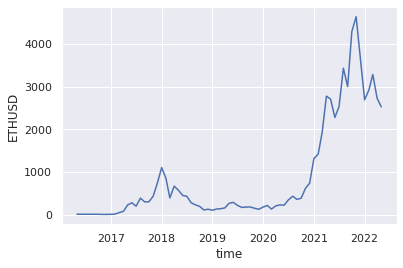

In [40]:
sns.lineplot(data = data, x = "time", y = "ETHUSD")

イーサリウムの折れ線グラフ

In [41]:
data2 = data.melt(id_vars="time", value_vars=data.columns[1:])
data2.head()

,time,variable,value
0,2015-01-01,BTCUSD,218.45
1,2015-02-01,BTCUSD,255.59
2,2015-03-01,BTCUSD,245.50
3,2015-04-01,BTCUSD,236.81
4,2015-05-01,BTCUSD,230.21


<AxesSubplot:xlabel='time', ylabel='value'>

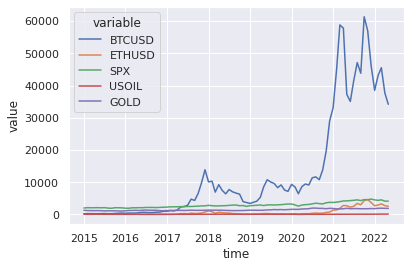

In [42]:
sns.lineplot(data = data2, x = "time", y = "value", hue = "variable")

全てを一つの図に描いたら、ビットコインの価格が大きすぎて、あまり見えない

(array([16436., 16556., 16679., 16801., 16922., 17045., 17167., 17287.,
        17410., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

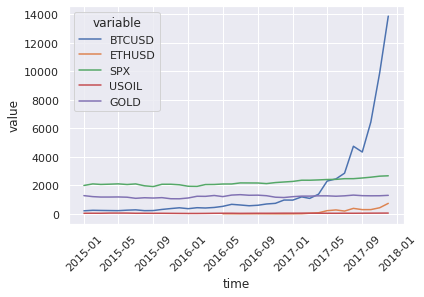

In [43]:
sns.lineplot(data = data2[data2["time"] < "2018-01-01"], x = "time", y = "value", hue = "variable")
plt.xticks(rotation=45)

2018年1月1日以前に絞ったら、どれくらいビットコインが激しく成長するのかが分かる